<a href="https://colab.research.google.com/github/Joseikwang/Time-Series/blob/main/Time_Series_With_Prophet_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# Load dataset
file_path = '/content/sales_06_FY2020-21 copy.csv'  # Assign the actual file path to file_path
df = pd.read_csv(file_path) # Read the CSV file into a DataFrame called df

In [ ]:
df.head()

order_id  order_date    status   item_id                  sku  \
0  100354678  2020-10-01  received  574772.0   oasis_Oasis-064-36   
1  100354678  2020-10-01  received  574774.0      Fantastic_FT-48   
2  100354680  2020-10-01  complete  574777.0      mdeal_DMC-610-8   
3  100354680  2020-10-01  complete  574779.0   oasis_Oasis-061-36   
4  100367357  2020-11-13  received  595185.0  MEFNAR59C38B6CA08CD   

   qty_ordered  price   value  discount_amount   total  ...          SSN  \
0         21.0   89.9  1798.0              0.0  1798.0  ...  627-31-5251   
1         11.0   19.0   190.0              0.0   190.0  ...  627-31-5251   
2          9.0  149.9  1199.2              0.0  1199.2  ...  627-31-5251   
3          9.0   79.9   639.2              0.0   639.2  ...  627-31-5251   
4          2.0   99.9    99.9              0.0    99.9  ...  627-31-5251   

     Phone No.  Place Name  County    City State    Zip Region User Name  \
0  405-959-1129     Vinson  Harmon  Vinson    OK  73571  South   jwtitus   
1  405-959-1129     Vinson  Harmon  Vinson    OK  73571  South   jwtitus   
2  405-959-1129     Vinson  Harmon  Vinson    OK  73571  South   jwtitus   
3  405-959-1129     Vinson  Harmon  Vinson    OK  73571  South   jwtitus   
4  405-959-1129     Vinson  Harmon  Vinson    OK  73571  South   jwtitus   

  Discount_Percent  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 36 columns]

In [ ]:
# Convert order_date to datetime
df["order_date"] = pd.to_datetime(df["order_date"])


In [ ]:
# Exploratory Data Analysis (EDA)
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          286392 non-null  object        
 1   order_date        286392 non-null  datetime64[ns]
 2   status            286392 non-null  object        
 3   item_id           286392 non-null  float64       
 4   sku               286392 non-null  object        
 5   qty_ordered       286392 non-null  float64       
 6   price             286392 non-null  float64       
 7   value             286392 non-null  float64       
 8   discount_amount   286392 non-null  float64       
 9   total             286392 non-null  float64       
 10  category          286392 non-null  object        
 11  payment_method    286392 non-null  object        
 12  bi_st             286392 non-null  object        
 13  cust_id           286392 non-null  float64   

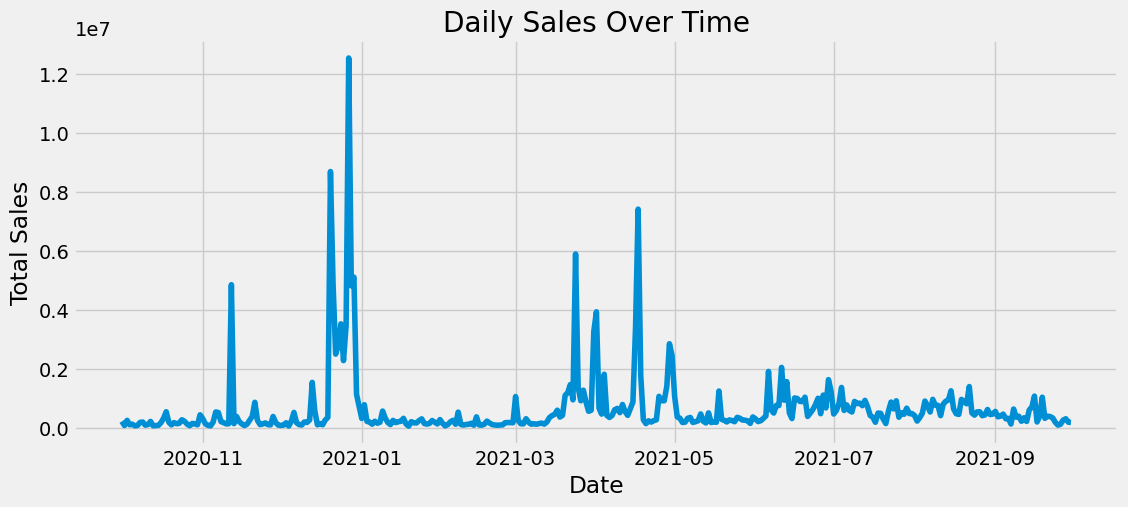

In [ ]:
# Plot daily sales trends
plt.figure(figsize=(12,5))
sns.lineplot(data=df.groupby("order_date")["total"].sum())
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

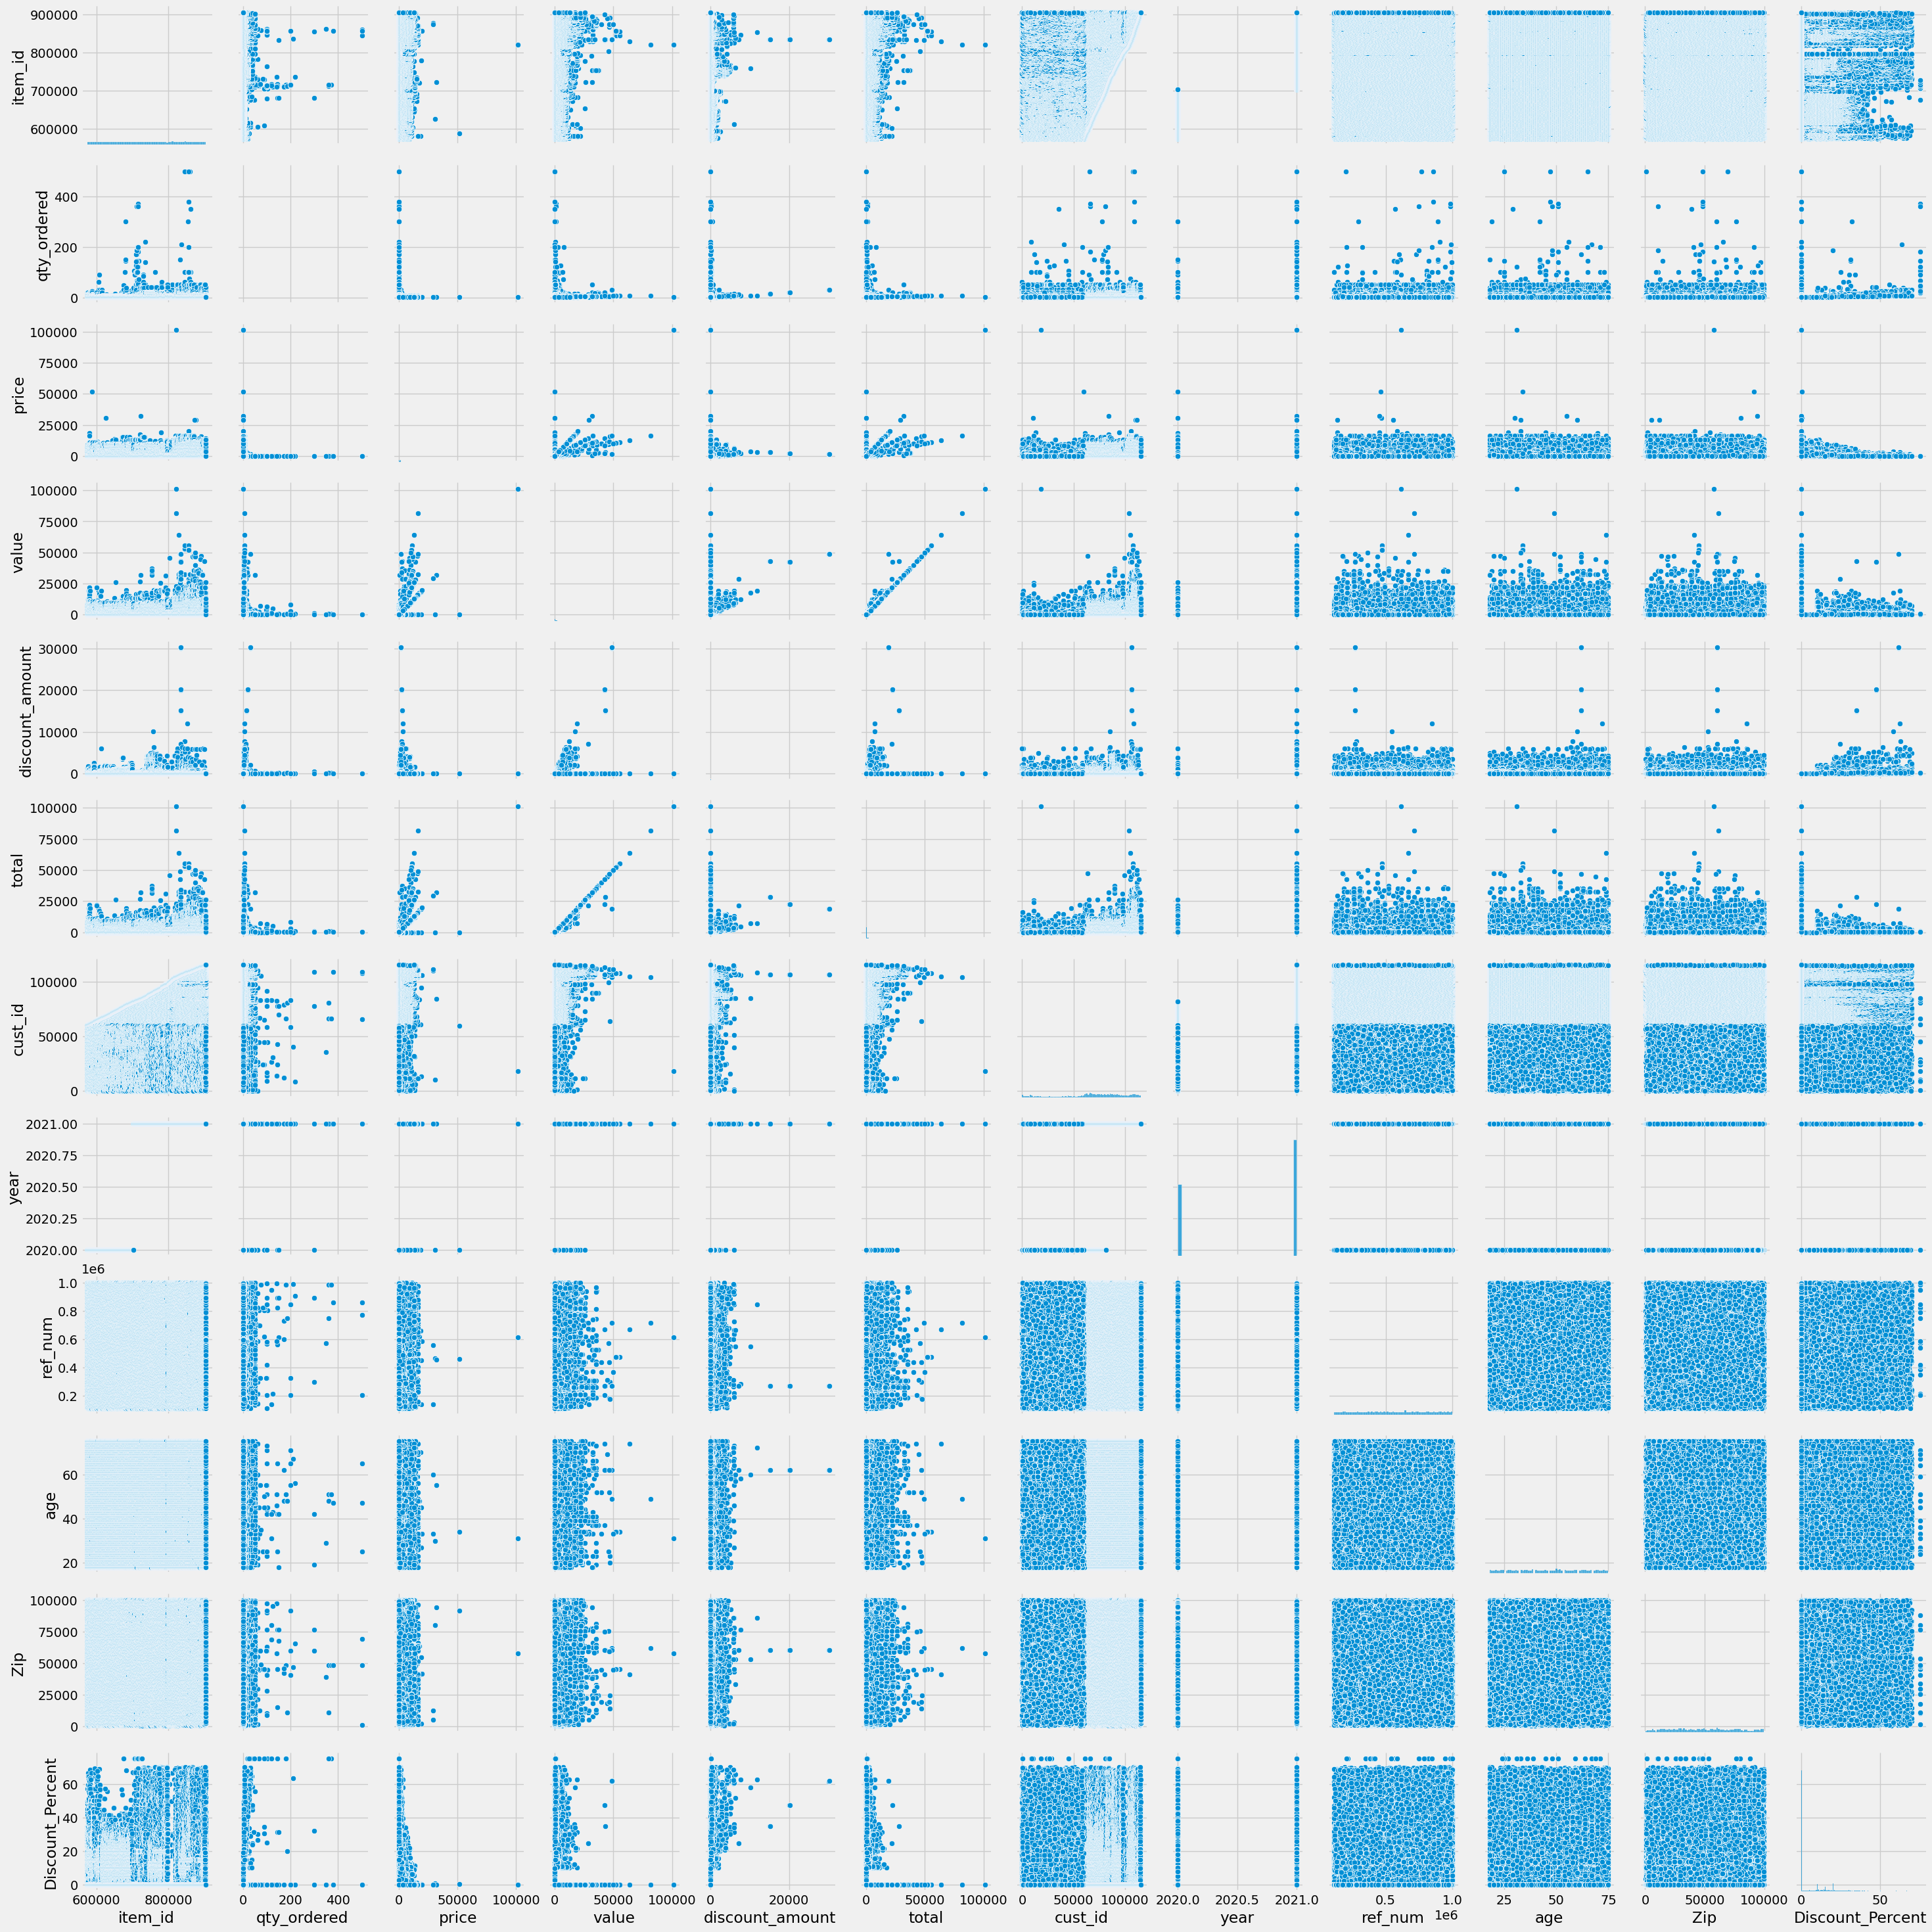

In [ ]:
# Plot a Pair plot
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()

In [ ]:
# Aggregate sales per day
df_sales = df.groupby("order_date")["total"].sum().reset_index()

In [ ]:
# Data Cleaning: Handle missing values
df_sales = df_sales.dropna()  # Drop missing values
df_sales = df_sales[df_sales["y"] > 0]  # Remove negative sales



In [ ]:
# Rename columns for Prophet
df_sales.rename(columns={"order_date": "ds", "total": "y"}, inplace=True)


In [ ]:
# Train-Test Split (80% train, 20% test)
split_idx = int(len(df_sales) * 0.8)
train, test = df_sales.iloc[:split_idx], df_sales.iloc[split_idx:]


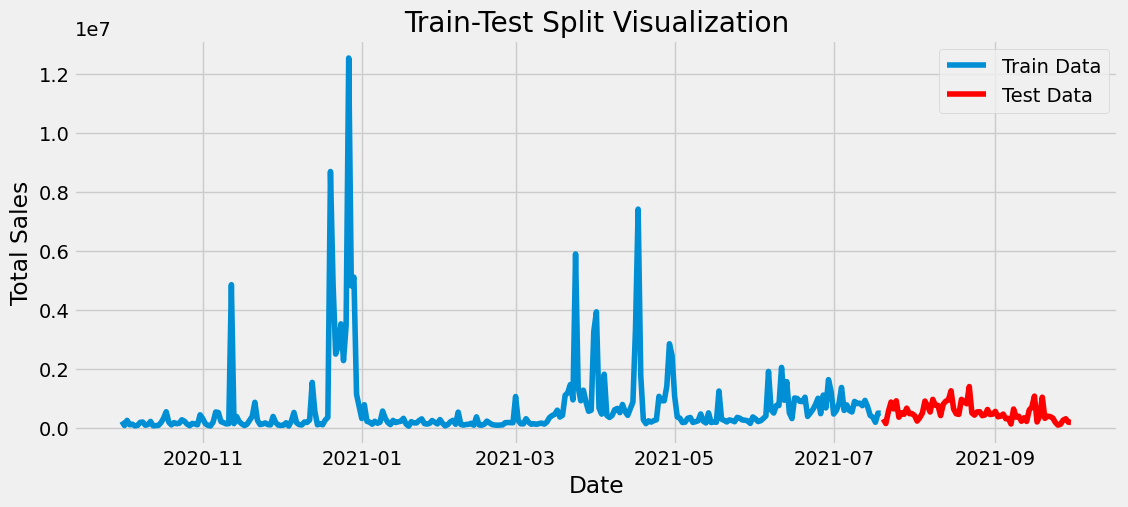

In [ ]:
# Plot train and test so we can see where we split
plt.figure(figsize=(12,5))
plt.plot(train["ds"], train["y"], label="Train Data")
plt.plot(test["ds"], test["y"], label="Test Data", color="red")
plt.legend()
plt.title("Train-Test Split Visualization")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
# Initialize and fit Prophet model
model = Prophet()
model.fit(df_sales)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw72o5iuv/tufb0qeq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw72o5iuv/uxl7gp0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85044', 'data', 'file=/tmp/tmpw72o5iuv/tufb0qeq.json', 'init=/tmp/tmpw72o5iuv/uxl7gp0l.json', 'output', 'file=/tmp/tmpw72o5iuv/prophet_model0y13hmtx/prophet_model-20250401090628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:06:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:06:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create future dataframe for 10 years ahead
future = model.make_future_dataframe(periods=3650)  # 10 years of daily predictions


In [ ]:
# Predict future sales
forecast = model.predict(future)


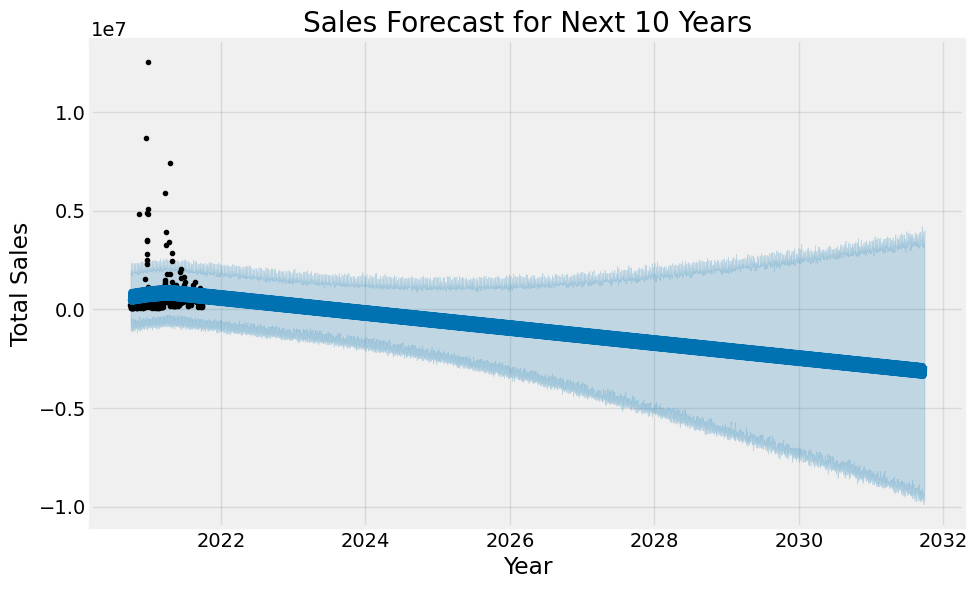

In [ ]:
# Plot the forecast
model.plot(forecast)
plt.title("Sales Forecast for Next 10 Years")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

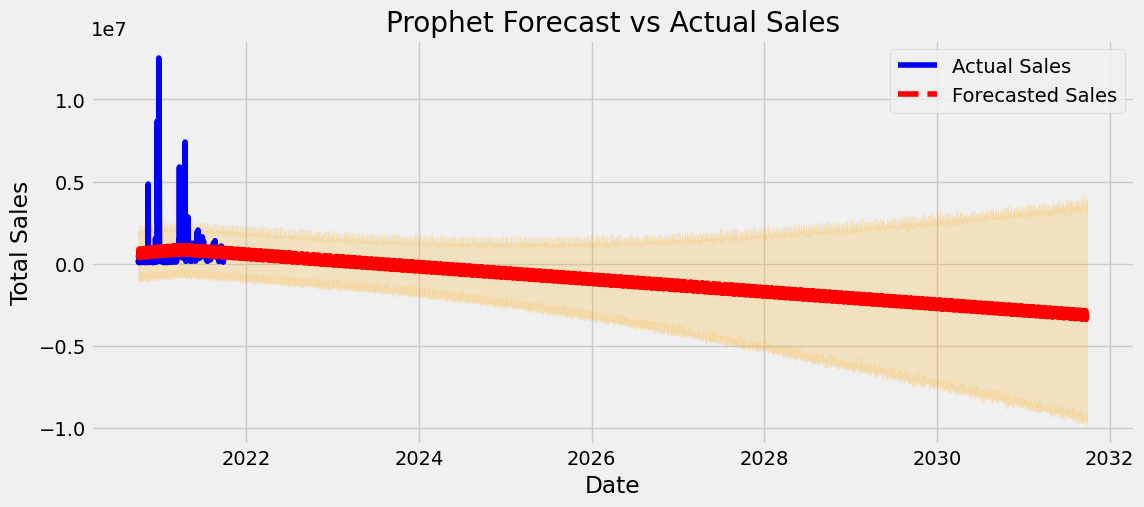

In [ ]:
# Plot the forecast with actuals
plt.figure(figsize=(12,5))
plt.plot(df_sales["ds"], df_sales["y"], label="Actual Sales", color="blue")
plt.plot(forecast["ds"], forecast["yhat"], label="Forecasted Sales", color="red", linestyle="dashed")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], alpha=0.2, color="orange")
plt.legend()
plt.title("Prophet Forecast vs Actual Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

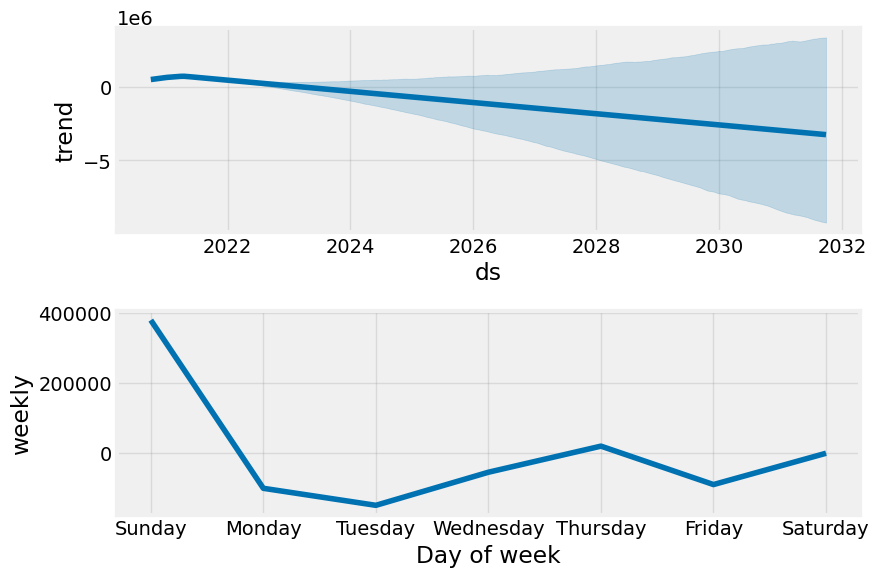

In [ ]:
# Plot forecast components (trend, seasonality)
model.plot_components(forecast)
plt.show()

In [ ]:
# Convert date strings to pandas Timestamp objects for xbound
xbound = [pd.Timestamp("2025-01-01"), pd.Timestamp("2030-01-01")]


In [ ]:
# Evaluation Metrics (Using last 20% of data for testing)
split_idx = int(len(df_sales) * 0.8)
train_df = df_sales.iloc[:split_idx]
test_df = df_sales.iloc[split_idx:]


In [ ]:
# Train model on training data
model_train = Prophet()
model_train.fit(train_df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw72o5iuv/ikl4l15f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw72o5iuv/9kz7ts5y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14037', 'data', 'file=/tmp/tmpw72o5iuv/ikl4l15f.json', 'init=/tmp/tmpw72o5iuv/9kz7ts5y.json', 'output', 'file=/tmp/tmpw72o5iuv/prophet_modeltgxu6o21/prophet_model-20250401090724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:07:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:07:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Make predictions on test set
future_test = model_train.make_future_dataframe(periods=len(test_df))
forecast_test = model_train.predict(future_test)


In [ ]:
# Merge actual and predicted values
test_df = test_df.set_index("ds")
forecast_test = forecast_test.set_index("ds")
merged_df = test_df.join(forecast_test[["yhat"]], how="inner")


In [ ]:
# Calculate error metrics
mae = mean_absolute_error(merged_df["y"], merged_df["yhat"])
mse = mean_squared_error(merged_df["y"], merged_df["yhat"])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((merged_df["y"] - merged_df["yhat"]) / merged_df["y"])) * 100

print("\n📊 Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



📊 Evaluation Metrics:
Mean Absolute Error (MAE): 348540.46
Mean Squared Error (MSE): 174809821197.79
Root Mean Squared Error (RMSE): 418102.64
Mean Absolute Percentage Error (MAPE): 122.04%


In [ ]:
# Show last few forecasted values
print("\n📌 Future Forecast (Next 5 Years):")
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(1825))  # Next 5 years



📌 Future Forecast (Next 5 Years):
             ds          yhat    yhat_lower    yhat_upper
2190 2026-09-30 -1.403350e+06 -4.015640e+06  1.327506e+06
2191 2026-10-01 -1.329974e+06 -3.942741e+06  1.354122e+06
2192 2026-10-02 -1.440617e+06 -4.166676e+06  1.468168e+06
2193 2026-10-03 -1.352340e+06 -4.040779e+06  1.472365e+06
2194 2026-10-04 -9.736375e+05 -3.676237e+06  1.758631e+06
...         ...           ...           ...           ...
4010 2031-09-24 -3.300381e+06 -9.362667e+06  3.319569e+06
4011 2031-09-25 -3.227006e+06 -9.512646e+06  3.489216e+06
4012 2031-09-26 -3.337649e+06 -9.709691e+06  3.517867e+06
4013 2031-09-27 -3.249372e+06 -9.663666e+06  3.488131e+06
4014 2031-09-28 -2.870669e+06 -9.008613e+06  4.005718e+06

[1825 rows x 4 columns]


In [ ]:
# Define holidays
holidays = pd.DataFrame({
    "holiday": "public_holiday",
    "ds": pd.to_datetime([
        "2021-01-01", "2021-12-25", "2021-07-04",
        "2021-11-25", "2021-05-01", "2021-10-31"
    ]),
    "lower_window": 0,
    "upper_window": 1,
})

In [ ]:
# Define holidays ensuring they are within your test data range
holidays = pd.DataFrame({
    "holiday": "public_holiday",
    "ds": pd.to_datetime(test["ds"].dt.date.unique()),  # Dates in test data
    "lower_window": 0,
    "upper_window": 1,
})

In [ ]:
# Train model with holidays
model_holiday = Prophet(holidays=holidays)
model_holiday.fit(train)



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw72o5iuv/d5bp3mgk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw72o5iuv/9kp6koqu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50816', 'data', 'file=/tmp/tmpw72o5iuv/d5bp3mgk.json', 'init=/tmp/tmpw72o5iuv/9kp6koqu.json', 'output', 'file=/tmp/tmpw72o5iuv/prophet_modelqmzksjw3/prophet_model-20250401091439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:14:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:14:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create future dataframe for forecasting (10 years ahead)
future = model_holiday.make_future_dataframe(periods=3650)

# Predict on training set with clean model and holidays
forecast_holiday = model_holiday.predict(future)




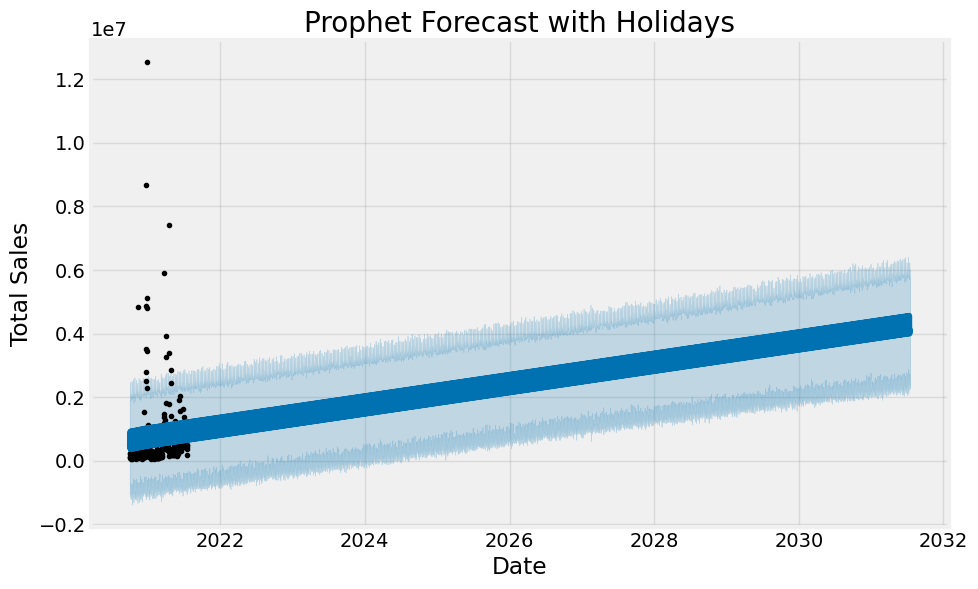

In [ ]:
# Plot the forecast
fig = model_holiday.plot(forecast_holiday)
plt.title("Prophet Forecast with Holidays")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()



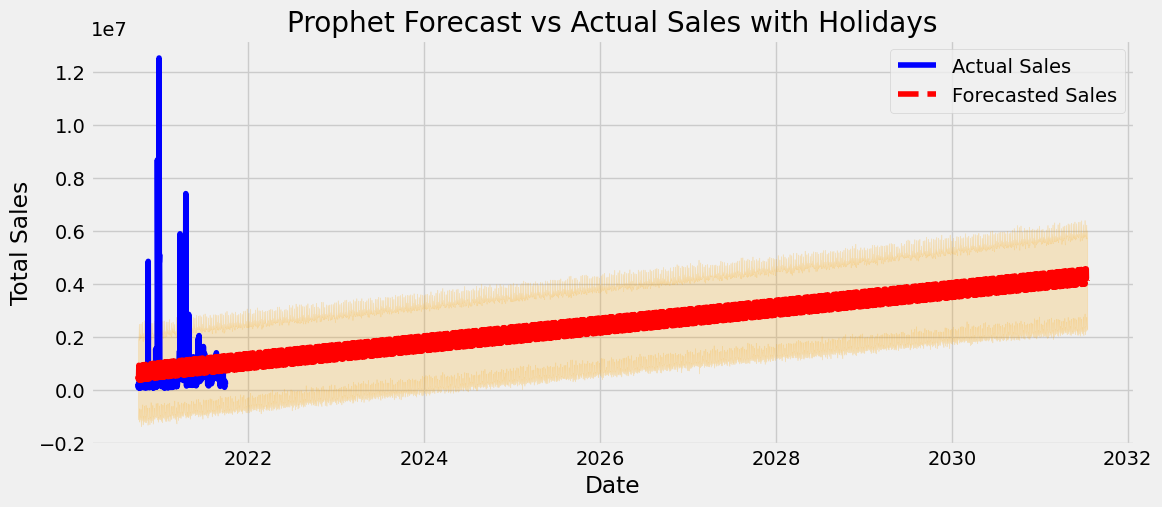

In [ ]:
# Plot the forecast with actuals
plt.figure(figsize=(12,5))
plt.plot(df_sales["ds"], df_sales["y"], label="Actual Sales", color="blue")
plt.plot(forecast_holiday["ds"], forecast_holiday["yhat"], label="Forecasted Sales", color="red", linestyle="dashed")
plt.fill_between(forecast_holiday["ds"], forecast_holiday["yhat_lower"], forecast_holiday["yhat_upper"], alpha=0.2, color="orange")
plt.legend()
plt.title("Prophet Forecast vs Actual Sales with Holidays")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()



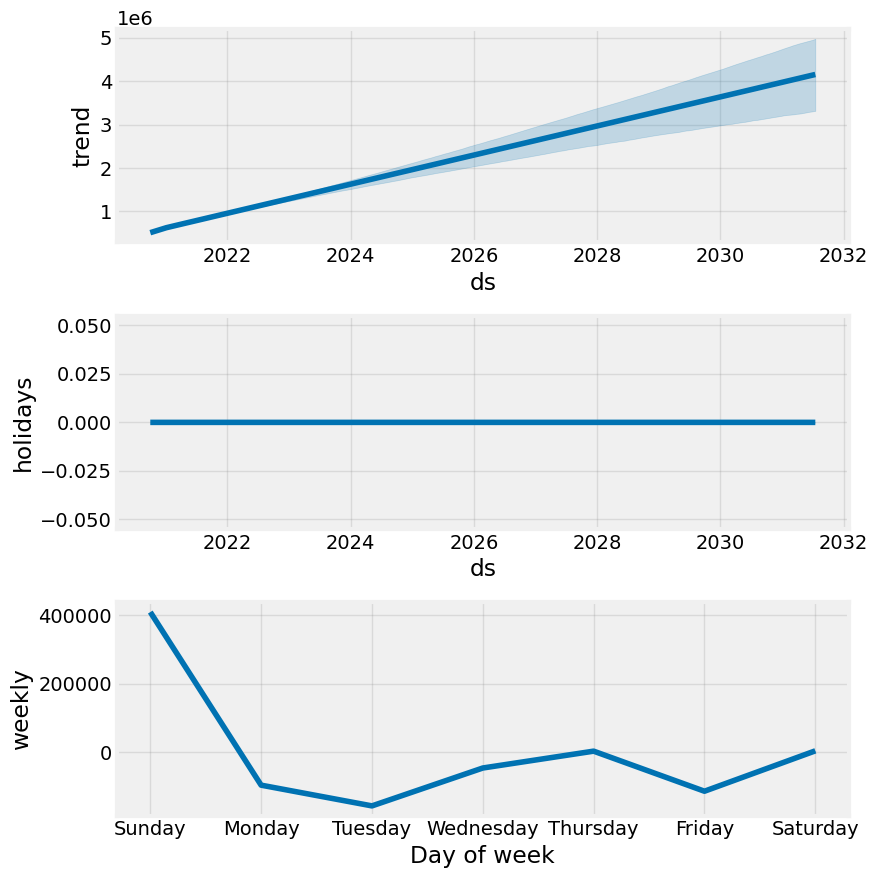

In [ ]:
# Plot holiday effect
model_holiday.plot_components(forecast_holiday)
plt.show()

In [ ]:
# Compute Error Metrics
def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)"""
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

test_forecast_holiday = forecast_holiday.set_index("ds").loc[test["ds"]]["yhat"]
mae_holiday = mean_absolute_error(test["y"], test_forecast_holiday)
mse_holiday = mean_squared_error(test["y"], test_forecast_holiday)
rmse_holiday = np.sqrt(mse_holiday)
mape_holiday = mean_absolute_percentage_error(test["y"], test_forecast_holiday)

print("\n📊 Evaluation Metrics with Holidays:")
print(f"Mean Absolute Error (MAE): {mae_holiday:.2f}")
print(f"Mean Squared Error (MSE): {mse_holiday:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_holiday:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_holiday:.2f}%")




📊 Evaluation Metrics with Holidays:
Mean Absolute Error (MAE): 348540.43
Mean Squared Error (MSE): 174809789648.69
Root Mean Squared Error (RMSE): 418102.61
Mean Absolute Percentage Error (MAPE): nan%


In [ ]:
# Compare models for holiday dates
holiday_actual = test[test["ds"].isin(holidays["ds"])]
holiday_forecast = forecast_holiday.set_index("ds").loc[holiday_actual["ds"]]["yhat"]

mae_holiday_only = mean_absolute_error(holiday_actual["y"], holiday_forecast)
mape_holiday_only = mean_absolute_percentage_error(holiday_actual["y"], holiday_forecast)

print("\n📊 Error for Holiday Dates Only:")
print(f"Mean Absolute Error (MAE): {mae_holiday_only:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_holiday_only:.2f}%")




📊 Error for Holiday Dates Only:
Mean Absolute Error (MAE): 348540.43
Mean Absolute Percentage Error (MAPE): nan%


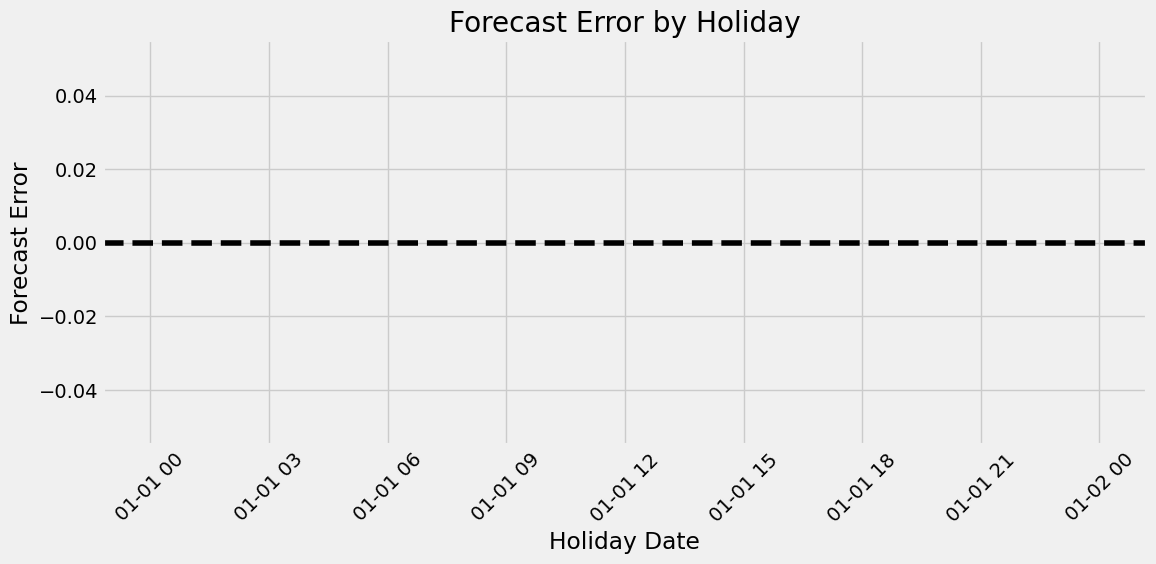

In [ ]:
# Identify error by holiday
holiday_error = holiday_actual.copy()
holiday_error["error"] = holiday_error["y"] - holiday_forecast

plt.figure(figsize=(12,5))
plt.bar(holiday_error["ds"], holiday_error["error"], color="red")
plt.axhline(y=0, color='black', linestyle='dashed')
plt.xticks(rotation=45)
plt.title("Forecast Error by Holiday")
plt.xlabel("Holiday Date")
plt.ylabel("Forecast Error")
plt.show()